# Data Analysis and Cleaning
analysis data and do some dirty work for cleaning
- <a href='#1'>1. analysis data</a> 
- <a href='#2'>2. task2</a> 
- <a href='#3'>3. task3</a>

In [1]:
import sys
import os 

from datetime import datetime

import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sys.path.append('../')
import conf

In [2]:
# global settings
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',100)
sns.set(rc={'figure.figsize':(11,4)})
font = fm.FontProperties(fname = os.path.join(conf.LIB_DIR,'simsun.ttc'))

In [3]:
# global variables
DEFAULT_MISSING_VALUE = 0

In [4]:
# functions
def __dummy():
    pass

def diivide_files_into_raw_and_normalized():
    pass

### <a id='1'> 1.task1</a>

In [5]:
# disk_sample_fault_tag
fault_tag_df = pd.read_csv(os.path.join(conf.DATA_DIR,'disk_sample_fault_tag.csv'))

In [25]:
fault_tag_df["tag"].value_counts()

0    473
2    200
3    171
1    171
6    153
5     64
4     60
Name: tag, dtype: int64

In [56]:
#display num of faults and type of faults in different months
fault_num = {}
fault_type = {}
tags = [0, 1, 2, 3, 4, 5, 6]

for index, row in fault_tag_df.iterrows():
    f_time = row["fault_time"].split('-')
    tag = int(row["tag"])
    month = f_time[0] + f_time[1]
    if month not in fault_num:
        fault_num[month] = 0
    if month not in fault_type:
        fault_type[month] = [0]*7
    fault_num[month] += 1
    fault_type[month][tag] += 1
    
print(sorted(fault_num.items(), key = lambda item:item[1], reverse = True))

[('201807', 167), ('201806', 138), ('201801', 128), ('201803', 119), ('201804', 117), ('201802', 108), ('201805', 104), ('201709', 93), ('201708', 82), ('201711', 81), ('201710', 80), ('201707', 55), ('201712', 20)]


In [60]:
fault_tag_df.loc[fault_tag_df["serial_number"]=="disk_110667"]

,manufacturer,model,serial_number,fault_time,tag
12,A,1,disk_110667,2017-07-23,0


Text(0.5, 1.0, '201709')

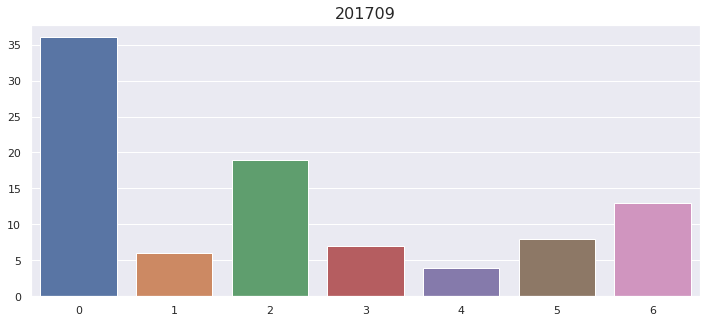

Text(0.5, 1.0, '201805')

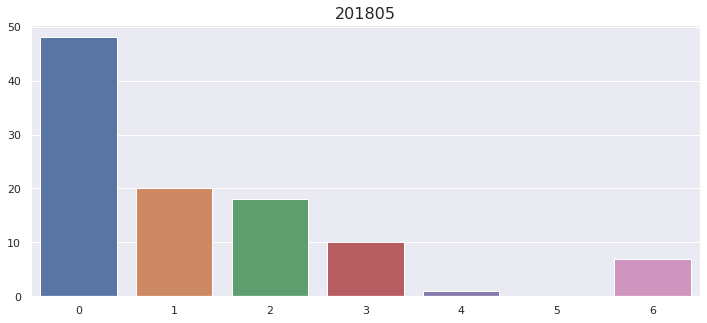

Text(0.5, 1.0, '201806')

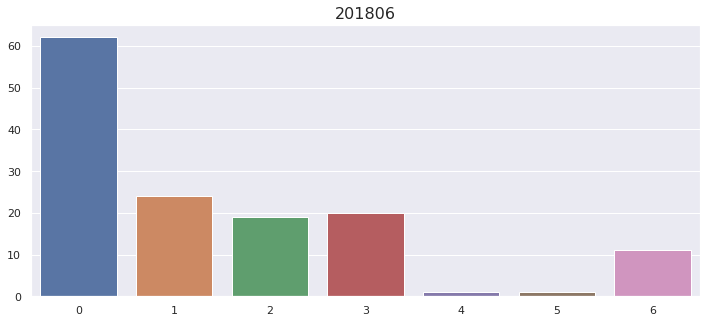

Text(0.5, 1.0, '201802')

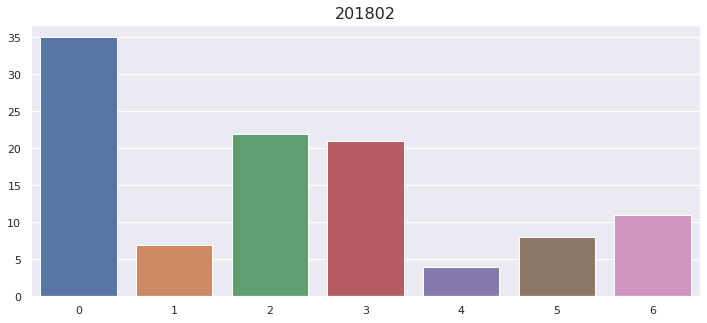

Text(0.5, 1.0, '201710')

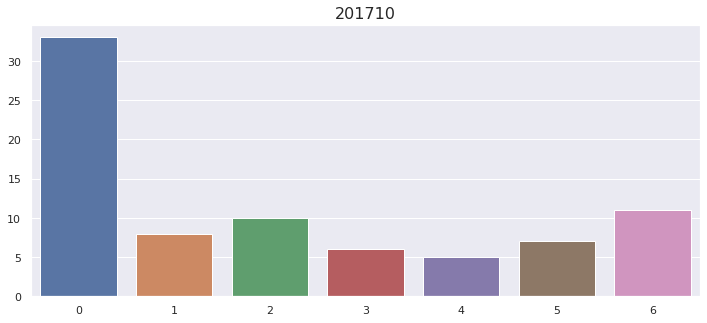

Text(0.5, 1.0, '201711')

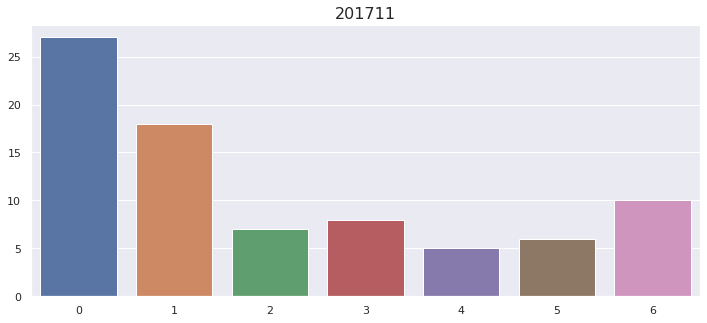

Text(0.5, 1.0, '201708')

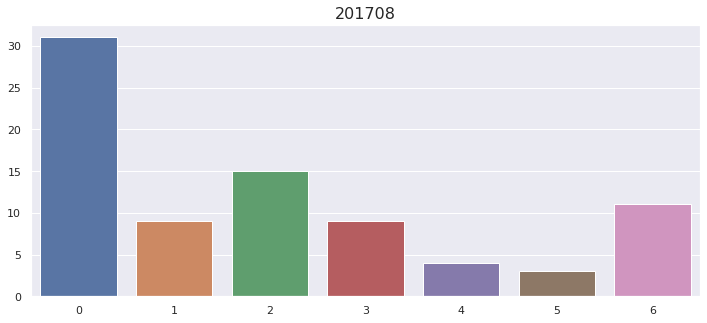

Text(0.5, 1.0, '201807')

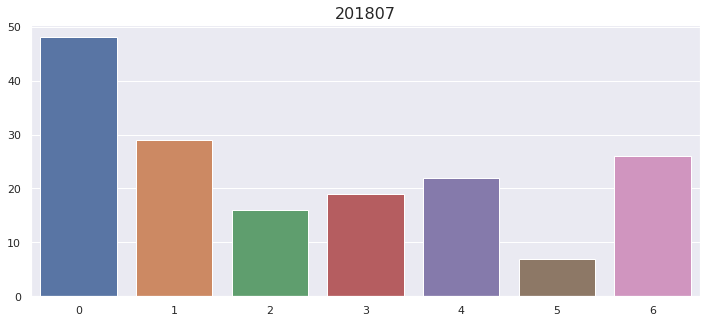

Text(0.5, 1.0, '201707')

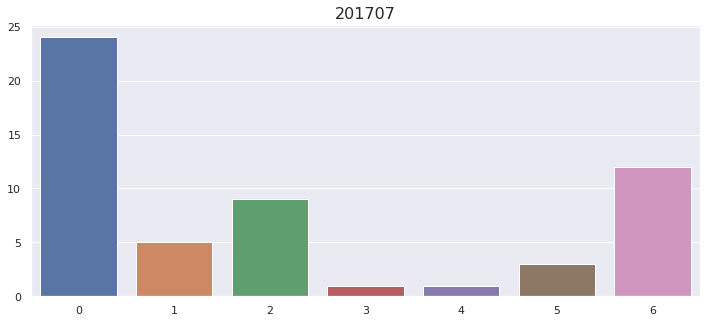

Text(0.5, 1.0, '201804')

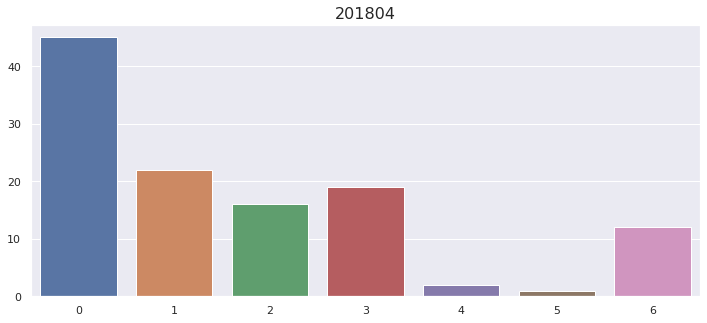

Text(0.5, 1.0, '201803')

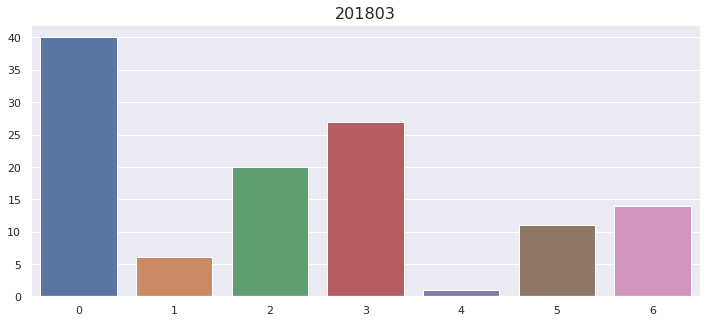

Text(0.5, 1.0, '201801')

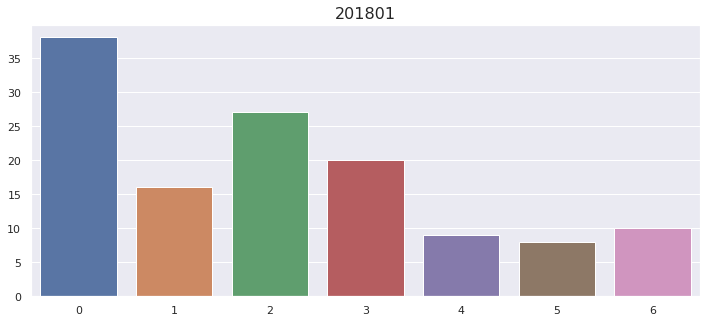

Text(0.5, 1.0, '201712')

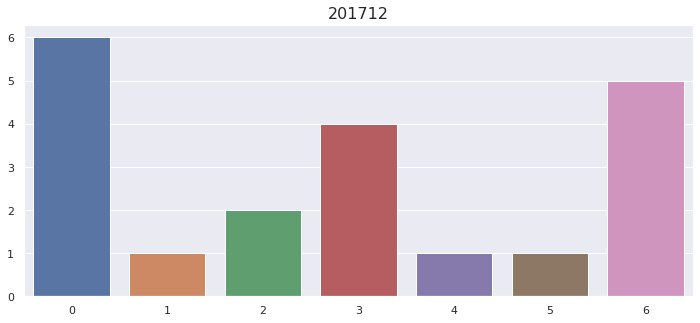

In [49]:
#show nums of different faults in each month
for item in fault_type.items():
    f, ax= plt.subplots(figsize = (12, 5))
    ax.set_title(item[0], fontsize=16)
    sns.barplot(x = tags, y = item[1])
    plt.show()

In [7]:
fault_tag_df.head()

,manufacturer,model,serial_number,fault_time,tag
0,A,1,disk_100102,2017-09-29,0
1,A,1,disk_100584,2018-05-02,6
2,A,1,disk_100669,2018-06-22,3
3,A,1,disk_101190,2018-02-19,5
4,A,1,disk_103158,2017-10-20,0


In [51]:
log_1707_norm_df = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201707_norm.csv'))

In [55]:
log_1707_norm_df.shape

(1610007, 28)

In [59]:
log_1707_norm_df.loc[log_1707_norm_df["serial_number"] == "disk_110667"]

,serial_number,manufacturer,model,dt,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_10_normalized,smart_12_normalized,smart_184_normalized,smart_187_normalized,smart_188_normalized,smart_189_normalized,smart_190_normalized,smart_191_normalized,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_195_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized
51876,disk_110667,A,1,20170715,82.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,38.0,100.0,100.0,200.0,NaN,NaN,NaN
93816,disk_110667,A,1,20170718,83.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,37.0,100.0,100.0,200.0,NaN,NaN,NaN
117003,disk_110667,A,1,20170717,84.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,37.0,100.0,100.0,200.0,NaN,NaN,NaN
195220,disk_110667,A,1,20170711,81.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,36.0,100.0,100.0,200.0,NaN,NaN,NaN
218586,disk_110667,A,1,20170713,81.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,35.0,100.0,100.0,200.0,NaN,NaN,NaN
441011,disk_110667,A,1,20170716,82.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,37.0,100.0,100.0,200.0,NaN,NaN,NaN
555642,disk_110667,A,1,20170720,66.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,38.0,100.0,100.0,200.0,NaN,NaN,NaN
768795,disk_110667,A,1,20170714,81.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,45.0,100.0,100.0,200.0,NaN,NaN,NaN
969068,disk_110667,A,1,20170719,83.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,36.0,100.0,100.0,200.0,NaN,NaN,NaN
1062829,disk_110667,A,1,20170712,80.0,95.0,100.0,100.0,93.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32.0,41.0,100.0,100.0,200.0,NaN,NaN,NaN


In [69]:
print(log_1707_norm_df.min(), log_1707_norm_df.max())

serial_number             disk_0
manufacturer                   A
model                          1
dt                      20170709
smart_1_normalized            36
smart_3_normalized            83
smart_4_normalized            53
smart_5_normalized             1
smart_7_normalized            42
smart_9_normalized            11
smart_10_normalized           98
smart_12_normalized           47
smart_184_normalized           1
smart_187_normalized           1
smart_188_normalized          75
smart_189_normalized           1
smart_190_normalized          44
smart_191_normalized           1
smart_192_normalized          74
smart_193_normalized          63
smart_194_normalized           0
smart_195_normalized           1
smart_197_normalized           1
smart_198_normalized           1
smart_199_normalized         200
smart_240_normalized         100
smart_241_normalized         100
smart_242_normalized         100
dtype: object serial_number           disk_99996
manufacturer               

In [ ]:
# disk_sample_smart_log_201707.csv
log_1711_norm_df = pd.DataFrame()
log_1711_raw_df = pd.DataFrame()

In [8]:
primary_key = ['serial_number','manufacturer', 'model', 'dt']
norm_cols = primary_key + ['smart_%s_normalized'%i for i in range(1,256)]
raw_cols = primary_key + ['smart_%sraw'%i for i in range(1,256)]

In [ ]:
for sub_df in pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201707.csv'),chunksize=1e+4):
        log_1711_norm_df = pd.concat([log_1711_norm_df, sub_df[norm_cols]])
        log_1711_raw_df = pd.concat([log_1711_raw_df, sub_df[raw_cols]])

In [ ]:
# remove nan column
log_1711_norm_df.dropna(axis=1, how='all', inplace=True)
log_1711_raw_df.dropna(axis=1,how='all', inplace=True)

In [ ]:
log_1711_norm_df.to_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201707_norm.csv'),index=False)
log_1711_raw_df.to_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201707_raw.csv'),index=False)

In [ ]:
log_1711_norm_df.head()

In [107]:
# use a dict to store fault information of each disk
# in given months.
fault_dic = {}
serial_list = []
months = ["201804","201805", "201806", "201807"]
for index, row in fault_tag_df.iterrows():
    f_time = row["fault_time"].split('-')
    tag = int(row["tag"])
    year_month = f_time[0] + f_time[1]
    date = ''.join(f_time)
    if year_month in months:
        sub_dic = {}
        sub_dic["date"] = int(date)
        sub_dic["tag"] = tag
        # found fault log with identical date.
        if row["serial_number"] in fault_dic:
            serial_list.append(row["serial_number"])
        fault_dic[row["serial_number"]] = sub_dic
        

In [95]:
# some fault occurred in July with multiple tags.
for i in range(len(serial_list)):
    print(fault_tag_df.loc[fault_tag_df["serial_number"] == serial_list[i]])

   manufacturer  model serial_number  fault_time  tag
72            A      1    disk_37873  2018-07-22    0
73            A      1    disk_37873  2018-07-22    6
    manufacturer  model serial_number  fault_time  tag
265            A      1   disk_120723  2018-07-31    1
266            A      1   disk_120723  2018-07-31    4
    manufacturer  model serial_number  fault_time  tag
356            A      1    disk_65482  2018-07-25    5
469            A      1    disk_65482  2018-07-25    4
    manufacturer  model serial_number  fault_time  tag
277            A      1   disk_130083  2018-07-16    6
661            A      1   disk_130083  2018-07-16    0
     manufacturer  model serial_number  fault_time  tag
446             A      1    disk_49806  2018-07-19    6
732             A      1    disk_49806  2018-07-19    0
1052            A      1    disk_49806  2018-07-19    1
    manufacturer  model serial_number  fault_time  tag
468            A      1    disk_65444  2018-07-27    0
746      

In [106]:
# compute days between 2 dates
def days_diff(date1, date2):
    date1_y = int(date1//1e4) 
    date1_m = int((date1//100)%100)
    date1_d = int(date1%100)
    date2_y = int(date2//1e4) 
    date2_m = int((date2//100)%100)
    date2_d = int(date2%100)
    return (datetime(date1_y, date1_m, date1_d)-datetime(date2_y, date2_m, date2_d)).days

In [113]:
data = [4,5,6,7]
for i in data:
    print('disk_sample_smart_log_20180%s_norm.csv' % i)
    df = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_20180%s_norm.csv' % i))    
    df["tag"] = 0
    for index, row in df.iterrows():
        if row["serial_number"] in fault_dic:
            fault_date = fault_dic[row["serial_number"]]["date"]
            if days_diff(fault_date, row["dt"]) >= 0 and days_diff(fault_date, row["dt"]) <= 30:
                row["tag"] = fault_dic[row["serial_number"]]["tag"] + 1
    df.to_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_20180%s_norm_tag.csv'%i),index=False)
    print("month %s finished" % i)

disk_sample_smart_log_201804_norm.csv
month 4 finished
disk_sample_smart_log_201805_norm.csv
month 5 finished
disk_sample_smart_log_201806_norm.csv
month 6 finished
disk_sample_smart_log_201807_norm.csv
month 7 finished


### To hdf5

In [14]:
filename = "train_4_5_norm_tag.h5"
df = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201804_norm_tag.csv'))

In [18]:
hdf_train = pd.HDFStore(os.path.join(conf.DATA_DIR,'train_4_5_norm_tag.h5'),'w')
hdf_train.put(key='data', value=df,format='table', data_columns=True)

In [19]:
del df
df1 = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201805_norm_tag.csv'))
hdf_train.append(key='data', value=df1, format='table', data_columns=True)

In [20]:
hdf_train.close()

In [21]:
del df1
validfile = "valid_6_norm_tag.h5"
df2 = pd.read_csv(os.path.join(conf.DATA_DIR, 'disk_sample_smart_log_201806_norm_tag.csv'))
hdf_valid = pd.HDFStore(os.path.join(conf.DATA_DIR,validfile),'w')
hdf_valid.put(key='data', value=df2,format='table', data_columns=True)
hdf_train.close()